# Substructures & substructure filters

## Introduction

The simplest use of this concept is to determine whether a given chemical structure contains a given substructure. Substructure patterns can be defined using SMARTS notation, which is kind of like a regular expression for chemical structures, i.e. SMARTS are to SMILES what regex are to strings. The materials provided as part of the actual lectures will probably have more theory about SMARTS, substructure search in general, as well as the underlying graph theory aspects. For some more applied info, the RDKit intro and RDKit Book go into good detail about substructure search.
 

## Learning objectives

 - again, load your own ligand set as well as DrugBank
 - try out the SMARTS-based substructure search on your own data
 - familiarize yourself with the notion of substructure search, if you haven't already from the lectures or other courses. Have a look at the linked resources.
 - Here, we tested our set and DrugBank for the -COOH functional group. Define your own SMARTS substructure, prefereably some functional group like -NH2, =O, etc. Run the substructure as a query on your own set, and against DrugBank. Any interesting outcome?
 - Have a look at PAINS. If you don't know them already, read up on the concept in the linked resources.
 - Scan your set for PAINS, have a look of how many of your structures have those substructures, and which ones. If you filter those structures out, how much would your set of structures shrink?
 - Bonus question: you might have noticed that extensive substructure searches take some time. Based on your experience and/or linked materials, any tips on why that might be? Any ideas on possible pre-filtering methods to speed things up?


## A story of cytochrome P450

In [190]:
# importing necessary tools and modules
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import itertools
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [197]:
# loading cytochrome data
df_cyt = pd.read_csv('Cytochrome_P450_targets.csv', sep=';')
    
# loading drugbank    
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [13:51:05] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [21:15:04] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [21:15:04] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [21:15:04] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [21:15:04] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [21:15:04] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [21:15:04] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [21:15:04] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [21:15:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [21:15:04] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [21:15:04] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [21:15:04] ERROR: Explicit v

In [198]:
# have a look on the data
df_cyt.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3109802,TBA-7371,2,355.40,0,1.22,12,COc1ncnc(Cn2cc(C(=O)NCCO)c3ncc(C)cc32)c1C,IC50,'>',...,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL3286390,1,Scientific Literature,J. Med. Chem.,2014.0,None,NaN
1,CHEMBL4071447,NaN,0,368.30,0,2.84,31,O=C(Nc1ccc(F)cn1)c1cc(Oc2cncc(F)c2)cn2cnnc12,IC50,'>',...,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL4043265,1,Scientific Literature,Bioorg Med Chem Lett,2017.0,None,NaN
2,CHEMBL4457739,NaN,0,464.52,0,0.23,19,C[C@@](CCN1Cc2cc(C#CC#CC3CN(CCF)C3)cn2C1=O)(C(...,IC50,'>',...,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL4321867,1,Scientific Literature,J Med Chem,2020.0,None,NaN
3,CHEMBL4472858,NaN,0,350.39,0,4.39,23,COc1cccc([C@@H](C)NC(=O)c2ccc(-c3ccncc3F)cc2)c1,IC50,'=',...,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL4325872,1,Scientific Literature,J Med Chem,2018.0,None,NaN
4,CHEMBL464234,NaN,0,479.54,0,3.27,18h,C[C@H]1CN(S(=O)(=O)C[C@]23CC[C@H](C[C@@H]2O)C3...,IC50,'=',...,Cytochrome P450 2C9,Homo sapiens,SINGLE PROTEIN,CHEMBL1139268,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2009.0,None,NaN


In [203]:
# let's find out methanol pattern in the first five structures of cytochrome P450 ligands
methanol_pattern = Chem.MolFromSmarts('CO')

mol_list = []
smiles_cyt = df_cyt['Smiles'].tolist()
id_cyt = df_cyt['Molecule ChEMBL ID'].tolist()
#print(smiles_cyt[:5])

# making molecules from the first five structures
for smiles in smiles_cyt[:5]:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)
    
#print(mol_list)

# testing if molecules are substructures of methanol
print('')
for i in zip(id_cyt, mol_list, smiles_cyt):
    print(i[0], end='\t')
    print(i[1].HasSubstructMatch(methanol_pattern), end='\t')
    print(i[2])


CHEMBL3109802	True	COc1ncnc(Cn2cc(C(=O)NCCO)c3ncc(C)cc32)c1C
CHEMBL4071447	False	O=C(Nc1ccc(F)cn1)c1cc(Oc2cncc(F)c2)cn2cnnc12
CHEMBL4457739	False	C[C@@](CCN1Cc2cc(C#CC#CC3CN(CCF)C3)cn2C1=O)(C(=O)NO)S(C)(=O)=O
CHEMBL4472858	True	COc1cccc([C@@H](C)NC(=O)c2ccc(-c3ccncc3F)cc2)c1
CHEMBL464234	True	C[C@H]1CN(S(=O)(=O)C[C@]23CC[C@H](C[C@@H]2O)C3(C)C)CCN1c1ncc(C(F)(F)F)cc1F


As we can see from above, three out of five molecules are substructures of methanol. Now, let's get indices of all matching atoms and bonds in those three structures.

In [204]:
print('ID\tIsSubstructure?\tAtoms\tBonds\tSmiles')
for i in zip(id_cyt, mol_list, smiles_cyt):
    print(i[0], end='\t')
    print(i[1].HasSubstructMatch(methanol_pattern), end='\t')
    print(i[1].GetSubstructMatch(methanol_pattern), end='\t') # indices of atoms
    print([i[1].GetBondBetweenAtoms(k, j).GetIdx() for k, j in itertools.combinations(i[1].GetSubstructMatch(methanol_pattern), 2) if i[1].GetBondBetweenAtoms(k, j)],  end='\t') # bonds
    print(i[2])

ID	IsSubstructure?	Atoms	Bonds	Smiles
CHEMBL3109802	True	(0, 1)	[0]	COc1ncnc(Cn2cc(C(=O)NCCO)c3ncc(C)cc32)c1C
CHEMBL4071447	False	()	[]	O=C(Nc1ccc(F)cn1)c1cc(Oc2cncc(F)c2)cn2cnnc12
CHEMBL4457739	False	()	[]	C[C@@](CCN1Cc2cc(C#CC#CC3CN(CCF)C3)cn2C1=O)(C(=O)NO)S(C)(=O)=O
CHEMBL4472858	True	(0, 1)	[0]	COc1cccc([C@@H](C)NC(=O)c2ccc(-c3ccncc3F)cc2)c1
CHEMBL464234	True	(13, 14)	[13]	C[C@H]1CN(S(=O)(=O)C[C@]23CC[C@H](C[C@@H]2O)C3(C)C)CCN1c1ncc(C(F)(F)F)cc1F


As it seen from above, molecules CHEMBL3109802 and CHEMBL4472858 are matching on atoms zero and one, while CHEMBL464234 is matching on atoms 13 and 14.

Let's chech the same for another pattern - histidine.

In [205]:
# defining histidine pattern
histidine_pattern = Chem.MolFromSmiles('O=C([C@H](CC1=CNC=N1)N)O')

print('ID\tIsSubstructure?\tAtoms\tBonds\tSmiles')
for i in zip(id_cyt, mol_list, smiles_cyt):
    print(i[0], end='\t')
    print(i[1].HasSubstructMatch(histidine_pattern), end='\t')
    print(i[1].GetSubstructMatch(histidine_pattern), end='\t') # indices of atoms
    print([i[1].GetBondBetweenAtoms(k, j).GetIdx() for k, j in itertools.combinations(i[1].GetSubstructMatch(histidine_pattern), 2) if i[1].GetBondBetweenAtoms(k, j)],  end='\t') # bonds
    print(i[2])

ID	IsSubstructure?	Atoms	Bonds	Smiles
CHEMBL3109802	False	()	[]	COc1ncnc(Cn2cc(C(=O)NCCO)c3ncc(C)cc32)c1C
CHEMBL4071447	False	()	[]	O=C(Nc1ccc(F)cn1)c1cc(Oc2cncc(F)c2)cn2cnnc12
CHEMBL4457739	False	()	[]	C[C@@](CCN1Cc2cc(C#CC#CC3CN(CCF)C3)cn2C1=O)(C(=O)NO)S(C)(=O)=O
CHEMBL4472858	False	()	[]	COc1cccc([C@@H](C)NC(=O)c2ccc(-c3ccncc3F)cc2)c1
CHEMBL464234	False	()	[]	C[C@H]1CN(S(=O)(=O)C[C@]23CC[C@H](C[C@@H]2O)C3(C)C)CCN1c1ncc(C(F)(F)F)cc1F


As we can see histidine is less frequent and none of my molecules contain this substructure.  Let's know create a dataframe and look at the whole Drugbank and Cytochrome P450 datasets to get some interesting statistics.

In [206]:
# defining functtions used in script
def molFromSmiles(row):
    return Chem.MolFromSmiles(row)

def methanol_match(row):
    return row.HasSubstructMatch(methanol_pattern)

def his_match(row):
    return row.HasSubstructMatch(histidine_pattern)    

def get_indices_methanol(row):
    return row.GetSubstructMatch(methanol_pattern)

def get_indices_his(row):
    return row.GetSubstructMatch(histidine_pattern)

def find_max_indices(row):
    return len(row)

def visualize_match(structure, pattern):
    # GetSubstructMatches grabs all hits, GetSubstructMatch the first one it finds
    hits = structure.GetSubstructMatches(pattern)
    hit_atoms = set()
    hit_bonds = set()
    for hit in hits:
        hit_atoms.update(hit)
        hit_bonds.update([structure.GetBondBetweenAtoms(i, j).GetIdx()
                          for i, j in itertools.combinations(hit_atoms, 2)
                          if structure.GetBondBetweenAtoms(i, j)])
    d = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(d, structure, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    d.FinishDrawing()
    display(SVG(d.GetDrawingText()))

In [207]:
# creating a df for cytochrome P450
df_cyt = df_cyt[['Molecule ChEMBL ID','Smiles']]
df_cyt = df_cyt.dropna()
df_cyt['Mol'] = df_cyt['Smiles'].apply(lambda l: molFromSmiles(l))
df_cyt['Methanol Substructure?'] = df_cyt['Mol'].apply(lambda l: methanol_match(l))
df_cyt['Atoms M'] = df_cyt['Mol'].apply(lambda l: get_indices_methanol(l))
df_cyt['Count indices M'] = df_cyt['Atoms M'].apply(lambda l: find_max_indices(l))
df_cyt['Histidin Substructure?'] = df_cyt['Mol'].apply(lambda l: his_match(l))
df_cyt['Atoms H'] = df_cyt['Mol'].apply(lambda l: get_indices_his(l))
df_cyt['Count indices H'] = df_cyt['Atoms H'].apply(lambda l: find_max_indices(l))

df_cyt.head()

,Molecule ChEMBL ID,Smiles,Mol,Methanol Substructure?,Atoms M,Count indices M,Histidin Substructure?,Atoms H,Count indices H
0,CHEMBL3109802,COc1ncnc(Cn2cc(C(=O)NCCO)c3ncc(C)cc32)c1C,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ace6c0>,True,"(0, 1)",2,False,(),0
1,CHEMBL4071447,O=C(Nc1ccc(F)cn1)c1cc(Oc2cncc(F)c2)cn2cnnc12,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ace710>,False,(),0,False,(),0
2,CHEMBL4457739,C[C@@](CCN1Cc2cc(C#CC#CC3CN(CCF)C3)cn2C1=O)(C(...,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ace580>,False,(),0,False,(),0
3,CHEMBL4472858,COc1cccc([C@@H](C)NC(=O)c2ccc(-c3ccncc3F)cc2)c1,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ace5d0>,True,"(0, 1)",2,False,(),0
4,CHEMBL464234,C[C@H]1CN(S(=O)(=O)C[C@]23CC[C@H](C[C@@H]2O)C3...,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ace760>,True,"(13, 14)",2,False,(),0


In [208]:
# creating a df for drugbank dataset
df_drugbank = pd.DataFrame({'Molecules': drugs,})
#print([i.GetPropsAsDict()["SMILES"] for i in drugs])
df_drugbank['Methanol Substructure?'] = df_drugbank['Molecules'].apply(lambda l: methanol_match(l))
df_drugbank['Atoms M'] = df_drugbank['Molecules'].apply(lambda l: get_indices_methanol(l))
df_drugbank['Count indices M'] = df_drugbank['Atoms M'].apply(lambda l: find_max_indices(l))
df_drugbank['Histidin Substructure?'] = df_drugbank['Molecules'].apply(lambda l: his_match(l))
df_drugbank['Atoms H'] = df_drugbank['Molecules'].apply(lambda l: get_indices_his(l))
df_drugbank['Count indices H'] = df_drugbank['Atoms H'].apply(lambda l: find_max_indices(l))

df_drugbank.head()

,Molecules,Methanol Substructure?,Atoms M,Count indices M,Histidin Substructure?,Atoms H,Count indices H
0,<rdkit.Chem.rdchem.Mol object at 0x7fe3acdae300>,True,"(67, 68)",2,False,(),0
1,<rdkit.Chem.rdchem.Mol object at 0x7fe3ca6d4a80>,True,"(50, 3)",2,False,(),0
2,<rdkit.Chem.rdchem.Mol object at 0x7fe3acf8f120>,False,(),0,False,(),0
3,<rdkit.Chem.rdchem.Mol object at 0x7fe3acf8ead0>,True,"(48, 49)",2,False,(),0
4,<rdkit.Chem.rdchem.Mol object at 0x7fe3acf8ec10>,True,"(3, 9)",2,False,(),0


In [209]:
# here I really hoped if one group is present more times in the molecule that there will be more indices than 2 and 11 but it didn't happen
print('df_cyt M: ',df_cyt['Count indices M'].max())
print('df_cyt H: ', df_cyt['Count indices H'].max())
print('df_drugbank M: ', df_drugbank['Count indices M'].max())
print('df_drugbank H: ', df_drugbank['Count indices H'].max())

df_cyt M:  2
df_cyt H:  11
df_drugbank M:  2
df_drugbank H:  11


Let's chceck how many substunces in my and drugbank dataset contain methanol and histidine group.

In [210]:
print('Number of molecules with methanol functional group: ' , df_cyt['Methanol Substructure?'].sum())
# looking at a few molecules  which have methanol substructure
df_cyt[df_cyt['Count indices M'] == 2].head()

Number of molecules with methanol functional group:  3473


,Molecule ChEMBL ID,Smiles,Mol,Methanol Substructure?,Atoms M,Count indices M,Histidin Substructure?,Atoms H,Count indices H
0,CHEMBL3109802,COc1ncnc(Cn2cc(C(=O)NCCO)c3ncc(C)cc32)c1C,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ace6c0>,True,"(0, 1)",2,False,(),0
3,CHEMBL4472858,COc1cccc([C@@H](C)NC(=O)c2ccc(-c3ccncc3F)cc2)c1,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ace5d0>,True,"(0, 1)",2,False,(),0
4,CHEMBL464234,C[C@H]1CN(S(=O)(=O)C[C@]23CC[C@H](C[C@@H]2O)C3...,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ace760>,True,"(13, 14)",2,False,(),0
5,CHEMBL3699082,OC(Cn1cnnc1)(c1ccc(F)cc1F)C(F)(F)c1cnc2cc(Cl)c...,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ace7b0>,True,"(1, 0)",2,False,(),0
6,CHEMBL3664718,CC(C)n1cc(-c2ccc([C@H](C)N3CC[C@](CC(C)(C)O)(c...,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ace800>,True,"(15, 27)",2,False,(),0


As it is seen from above 3473 molecules over 5809 in my dataset have methanol group. Let's visualize some of them.

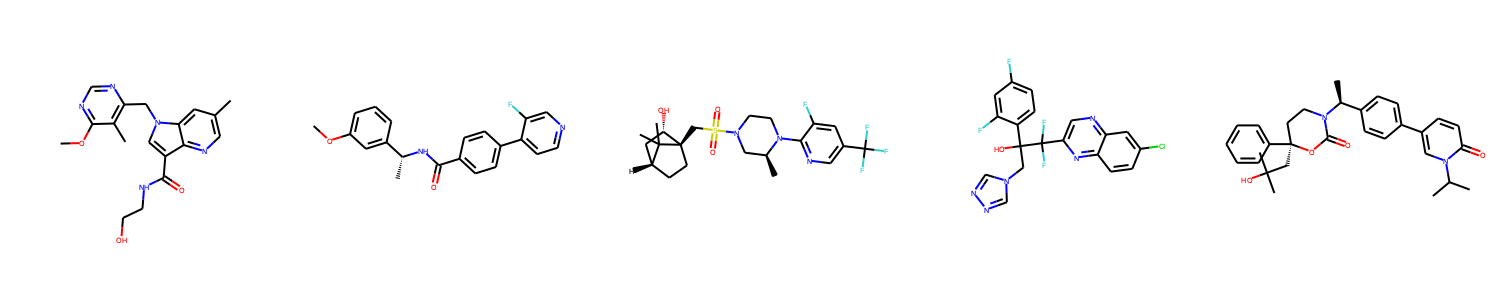

In [211]:
structure_cyt_m = df_cyt[df_cyt['Count indices M'] == 2]['Mol'].tolist()
Draw.MolsToGridImage(structure_cyt_m[:5], molsPerRow=5, subImgSize=(300,300))

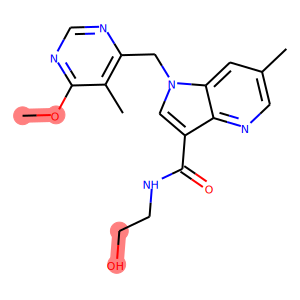

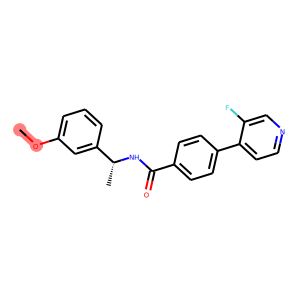

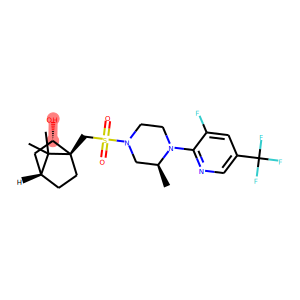

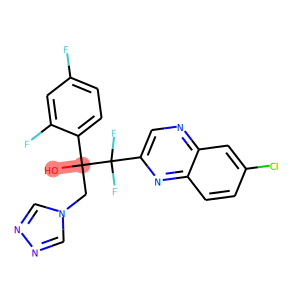

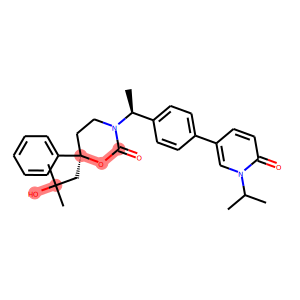

In [212]:
# let's visualize methanol functional group in these molecules
for i in structure_cyt_m[:5]:
    visualize_match(i,methanol_pattern)

In [213]:
print('Number of molecules with histidine functional group: ' , df_cyt['Histidin Substructure?'].sum())
df_cyt[df_cyt['Count indices H'] > 0].head() 

Number of molecules with histidine functional group:  1


,Molecule ChEMBL ID,Smiles,Mol,Methanol Substructure?,Atoms M,Count indices M,Histidin Substructure?,Atoms H,Count indices H
2212,CHEMBL270272,COC(=O)[C@H](Cc1c[nH]cn1)NCc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7fe3b48d6670>,True,"(0, 1)",2,True,"(3, 2, 4, 5, 6, 7, 8, 9, 10, 11, 1)",11


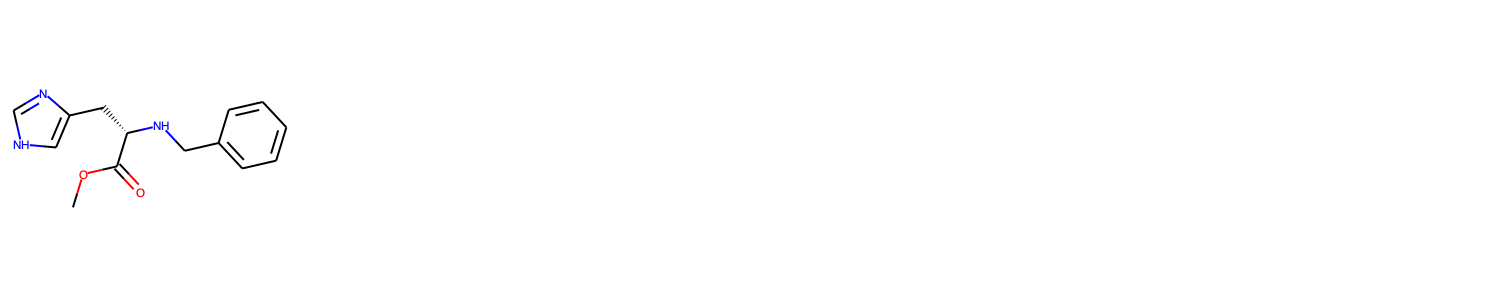

In [214]:
structure_cyt_h = df_cyt[df_cyt['Count indices H'] > 0]['Mol'].tolist()
Draw.MolsToGridImage(structure_cyt_h[:5], molsPerRow=5, subImgSize=(300,300))

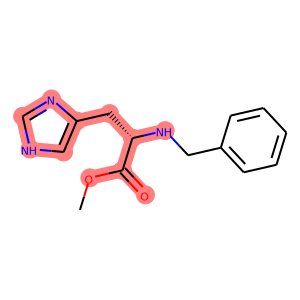

In [215]:
visualize_match(structure_cyt_h[0],histidine_pattern)

As it is seen from above there is only one molecule in my dataset which contains Histidine and it's CHEMBL270272 with the following smiles structure COC(=O)[C@H](Cc1c[nH]cn1)NCc1ccccc1.

In [216]:
print('Number of molecules with methanol functional group: ' , df_drugbank['Methanol Substructure?'].sum())
print('Number of molecules in drugbank dataset: ' , len(df_drugbank))
df_drugbank[df_drugbank['Count indices M'] == 2].head()

Number of molecules with methanol functional group:  4901
Number of molecules in drugbank dataset:  7113


,Molecules,Methanol Substructure?,Atoms M,Count indices M,Histidin Substructure?,Atoms H,Count indices H
0,<rdkit.Chem.rdchem.Mol object at 0x7fe3acdae300>,True,"(67, 68)",2,False,(),0
1,<rdkit.Chem.rdchem.Mol object at 0x7fe3ca6d4a80>,True,"(50, 3)",2,False,(),0
3,<rdkit.Chem.rdchem.Mol object at 0x7fe3acf8ead0>,True,"(48, 49)",2,False,(),0
4,<rdkit.Chem.rdchem.Mol object at 0x7fe3acf8ec10>,True,"(3, 9)",2,False,(),0
6,<rdkit.Chem.rdchem.Mol object at 0x7fe3c93f0120>,True,"(40, 47)",2,False,(),0


As it is seen from above 4901 molecules over 7113 have methanol group or methanol is substructure of those molecules.

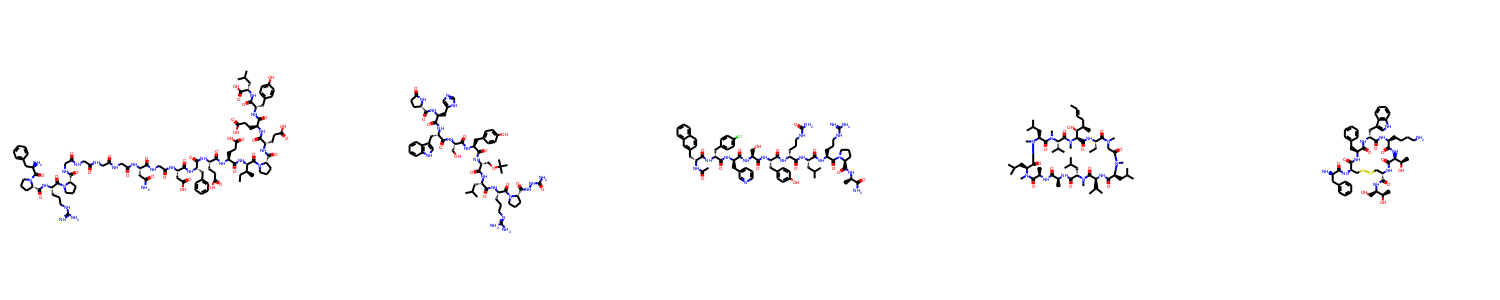

In [217]:
structure_drugbank_m = df_drugbank[df_drugbank['Count indices M'] == 2]['Molecules'].tolist()
Draw.MolsToGridImage(structure_drugbank_m[:5], molsPerRow=5, subImgSize=(300,300))

In [218]:
print('Number of molecules with histidine functional group: ' , df_drugbank['Histidin Substructure?'].sum())
df_drugbank[df_drugbank['Count indices H'] == 11].head()

Number of molecules with histidine functional group:  4


,Molecules,Methanol Substructure?,Atoms M,Count indices M,Histidin Substructure?,Atoms H,Count indices H
10,<rdkit.Chem.rdchem.Mol object at 0x7fe3d8892f80>,True,"(8, 0)",2,True,"(1, 8, 6, 5, 7, 9, 4, 10, 2, 3, 0)",11
1655,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4886260>,True,"(12, 13)",2,True,"(14, 12, 1, 2, 3, 4, 5, 6, 7, 0, 13)",11
3689,<rdkit.Chem.rdchem.Mol object at 0x7fe3b48aed00>,True,"(8, 9)",2,True,"(10, 8, 6, 5, 4, 11, 1, 2, 3, 7, 9)",11
6935,<rdkit.Chem.rdchem.Mol object at 0x7fe3b485bbc0>,True,"(8, 15)",2,True,"(14, 8, 6, 2, 5, 3, 10, 4, 11, 12, 15)",11


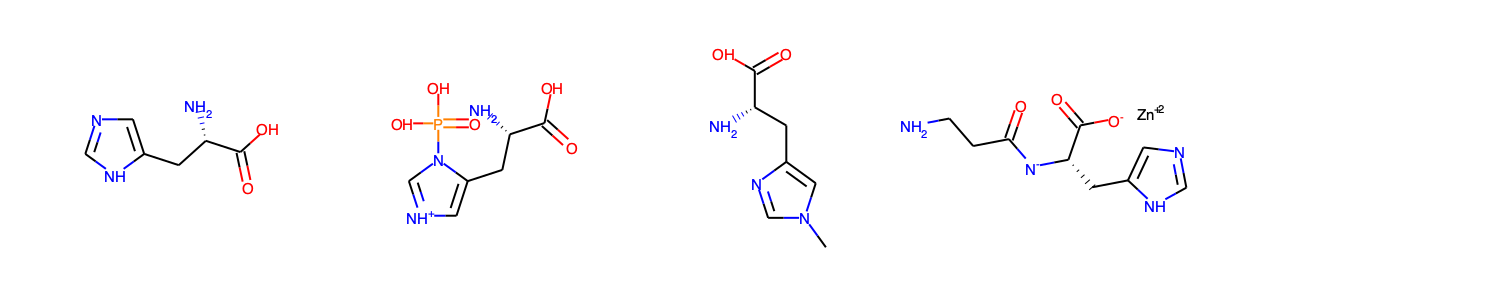

In [219]:
structure_drugbank_h = df_drugbank[df_drugbank['Count indices H'] == 11]['Molecules'].tolist()
Draw.MolsToGridImage(structure_drugbank_h[:5], molsPerRow=5, subImgSize=(300,300))

As we can see there are 4 molecules in drugbank dataset which contain histidine group.

## PAINS

In addition to our custom queries, there are also established lists of substructures put together for a specific purpose. Widely used, and widely discussed are the PAINS, or PAn -Assay INterference compoundS. These are structural patterns that are known to interfere with the mechanism of assays used to screen for substances with a desired biological activity. These structures are likely to come up as false positivies in assays, and might become a trap that consumes time and resources of those unfamiliar with those factors. As always in cheminformatics, PAINS are not a panacea and should be used with care. They are definitively red flags, though, and you should be definitely aware of them. As shown in the Nature article:

In [224]:
# loading PAIN structures to a list
pains = []
with open('../data/pains/p_l15.txt', 'r') as f, open('../data/pains/p_m150.txt', 'r') as p:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t')
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")])

print('The number of given structures with PAINs: ', len(pains))

The number of given structures with PAINs:  425


In [222]:
# filtering my data fo PAINS
df_ligands = pd.DataFrame(columns=["ligand", "pain_association", "pain_structure"])
for l in df_cyt['Mol']:
    for p in pains:
        if l.HasSubstructMatch(p[0]):
            x = {"ligand": l, "pain_association": p[0], "pain_structure": p[1]}
            df_ligands = df_ligands.append(x, ignore_index=True)
df_ligands

,ligand,pain_association,pain_structure
0,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ad7c10>,<rdkit.Chem.rdchem.Mol object at 0x7fe3ddba0c10>,quinone_A(370)
1,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ad8cb0>,<rdkit.Chem.rdchem.Mol object at 0x7fe3ddba0760>,anil_di_alk_D(198)
2,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ad93f0>,<rdkit.Chem.rdchem.Mol object at 0x7fe3ddba0c10>,quinone_A(370)
3,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ad9760>,<rdkit.Chem.rdchem.Mol object at 0x7fe3ddba0c10>,quinone_A(370)
4,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ae0670>,<rdkit.Chem.rdchem.Mol object at 0x7fe3ddba0760>,anil_di_alk_D(198)
5,<rdkit.Chem.rdchem.Mol object at 0x7fe3b4ae3490>,<rdkit.Chem.rdchem.Mol object at 0x7fe3ddba0080>,anil_di_alk_B(251)
6,<rdkit.Chem.rdchem.Mol object at 0x7fe3b48bd940>,<rdkit.Chem.rdchem.Mol object at 0x7fe3ddba0760>,anil_di_alk_D(198)
7,<rdkit.Chem.rdchem.Mol object at 0x7fe3b48c22b0>,<rdkit.Chem.rdchem.Mol object at 0x7fe3ddba0760>,anil_di_alk_D(198)
8,<rdkit.Chem.rdchem.Mol object at 0x7fe3b48c4990>,<rdkit.Chem.rdchem.Mol object at 0x7fe3ddba0760>,anil_di_alk_D(198)
9,<rdkit.Chem.rdchem.Mol object at 0x7fe3b48c5580>,<rdkit.Chem.rdchem.Mol object at 0x7fe3ddba0760>,anil_di_alk_D(198)


As we can see from above, there are 55 structures in my dataset with PAINS out odf possible 425 known PAINs structures.

If I  filter PAIN structures from my dataset I will filter only 1% of the dataset, so 99% of dataset would not have PAINs structures. But let's anyway visualize few of them.

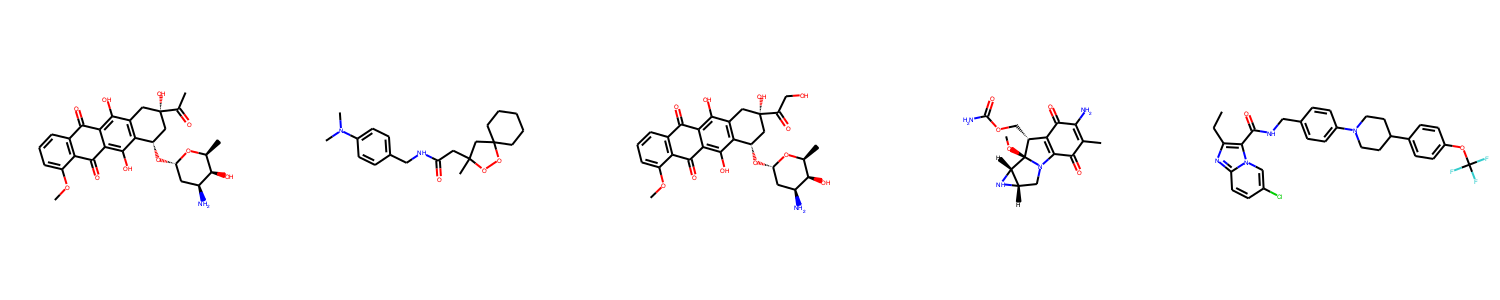

In [225]:
# visualizong PAINS
ligand_list = df_ligands.ligand.to_list()
Draw.MolsToGridImage(ligand_list[:5], molsPerRow=5, subImgSize=(300,300))

**BONUS QUESTION**: you might have noticed that extensive substructure searches take some time. Based on your experience and/or linked materials, any tips on why that might be? Any ideas on possible pre-filtering methods to speed things up?

**ANSWER**: we can filter on the minimal molecular weight first if for example the histidine I used in my dataset has Mr = 155.1546 g/mol. Molecules which do not have at least this molecular weight can not have histidine substructure.

## Conclusion

In this exercise, I learned how to filter the dataset of substances on different functional groups and and how to visualize these functional groups in the molecules. Moreover, I learned how to filter mydataset on substances which are interfere with the mechanism of assays used to screen for substances with a desired biological activity. It can be an important step for selection of molecules for *in vitro* studies.